In [142]:
import requests
import json
import pandas as pd
import urllib
import seaborn as sns
import numpy as np

In [191]:
print('Question 1: This dataset is crime rates as recorded by the FBI from 1997-2016. It is measured by Volume and Rate per 100,000 inhabitants. The Population each year is an estimate except in 2000 and 2010 which are census counts. I will be using basic commands with Pandas on the dataframe in Python. The questions I am asking are: 1) Which year had the highest violent crime rate proportional to the population? I am asking this question to see which year had the highest crime rate.Perhaps there were events in that year that may have caused the crime rate to be high. That would tell data scientists what types of events may raise crime rates. To answer this question I will list the largest 5 numbers in the "Violent Crime rate column." 2) What kind of correlation is there between burglary, larceny and motor vehicle theft? I am asking this to see if there is any relationship between different types of theft that occur. Correlation does not mean causation but they may have similar trends. 3) How does the violent crime rate change over the time period? This question seeks to see whether the crime rate increases, decreases or stays the same over a certain time period. It can also be helpful in predicting the future trend of the violent crime rate')

Question 1: This dataset is crime rates as recorded by the FBI from 1997-2016. It is measured by Volume and Rate per 100,000 inhabitants. The Population each year is an estimate except in 2000 and 2010 which are census counts. I will be using basic commands with Pandas on the dataframe in Python. The questions I am asking are: 1) Which year had the highest violent crime rate proportional to the population? I am asking this question to see which year had the highest crime rate.Perhaps there were events in that year that may have caused the crime rate to be high. That would tell data scientists what types of events may raise crime rates. To answer this question I will list the largest 5 numbers in the "Violent Crime rate column." 2) What kind of correlation is there between burglary, larceny and motor vehicle theft? I am asking this to see if there is any relationship between different types of theft that occur. Correlation does not mean causation but they may have similar trends. 3) How

In [192]:
print('Question 2:The Data is obtained from: https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/topic-pages/tables/table-1 and downloaded as an Excel Spreadsheet. It is 44 KB. There are 20 rows and 23 columns.')

Question 2:The Data is obtained from: https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/topic-pages/tables/table-1 and downloaded as an Excel Spreadsheet. It is 44 KB. There are 20 rows and 23 columns.


In [143]:
ls ~/ #Question 3: imputing the data

anaconda3/                   DataSciFinal(2).ipynb  yahyahyeetyah.csv
Crime Rate Data Science.xls  DataSciFinal.ipynb     yeet.csv
DataSciFinal(1).ipynb        workspace/


In [144]:
df = pd.read_csv("resources/data/yahyahyeetyah.csv", header = 0)

In [145]:
df.head(20)

,Year,Population,Violent Crime,Violent Crime Rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape,Rape rate,Rape (legacy definition),Rape (legacy definition rate),...,Aggrevated assault rate,Property crime,Property crime rate,Burglary,Burglary rate,Larceny theft,Larceny theft rate,Motor vehicle theft,Motor vehicle theft rate,Unnamed: 22
0,1997,"267,783,607","1,636,096",611.0,"18,208",6.8,NaN,NaN,"96,153",35.9,...,382.1,"11,558,475","4,316.3","2,460,526",918.8,"7,743,760","2,891.8","1,354,189",505.7,NaN
1,1998,"270,248,003","1,533,887",567.6,"16,974",6.3,NaN,NaN,"93,144",34.5,...,361.4,"10,951,827","4,052.5","2,332,735",863.2,"7,376,311","2,729.5","1,242,781",459.9,NaN
2,1999,"272,690,813","1,426,044",523.0,"15,522",5.7,NaN,NaN,"89,411",32.8,...,334.3,"10,208,334","3,743.6","2,100,739",770.4,"6,955,520","2,550.7","1,152,075",422.5,NaN
3,2000,"281,421,906","1,425,486",506.5,"15,586",5.5,NaN,NaN,"90,178",32.0,...,324.0,"10,182,584","3,618.3","2,050,992",728.8,"6,971,590","2,477.3","1,160,002",412.2,NaN
4,2001,"285,317,559","1,439,480",504.5,"16,037",5.6,NaN,NaN,"90,863",31.8,...,318.6,"10,437,189","3,658.1","2,116,531",741.8,"7,092,267","2,485.7","1,228,391",430.5,NaN
5,2002,"287,973,924","1,423,677",494.4,"16,229",5.6,NaN,NaN,"95,235",33.1,...,309.5,"10,455,277","3,630.6","2,151,252",747.0,"7,057,379","2,450.7","1,246,646",432.9,NaN
6,2003,"290,788,976","1,383,676",475.8,"16,528",5.7,NaN,NaN,"93,883",32.3,...,295.4,"10,442,862","3,591.2","2,154,834",741.0,"7,026,802","2,416.5","1,261,226",433.7,NaN
7,2004,"293,656,842","1,360,088",463.2,"16,148",5.5,NaN,NaN,"95,089",32.4,...,288.6,"10,319,386","3,514.1","2,144,446",730.3,"6,937,089","2,362.3","1,237,851",421.5,NaN
8,2005,"296,507,061","1,390,745",469.0,"16,740",5.6,NaN,NaN,"94,347",31.8,...,290.8,"10,174,754","3,431.5","2,155,448",726.9,"6,783,447","2,287.8","1,235,859",416.8,NaN
9,2006,"299,398,484","1,435,123",479.3,"17,309",5.8,,NaN,"94,472",31.6,...,292.0,"10,019,601","3,346.6","2,194,993",733.1,"6,626,363","2,213.2","1,198,245",400.2,NaN


In [146]:
df[df['Violent Crime Rate'] > 500].head(10) #Answering the questions

,Year,Population,Violent Crime,Violent Crime Rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape,Rape rate,Rape (legacy definition),Rape (legacy definition rate),...,Aggrevated assault rate,Property crime,Property crime rate,Burglary,Burglary rate,Larceny theft,Larceny theft rate,Motor vehicle theft,Motor vehicle theft rate,Unnamed: 22
0,1997,"267,783,607","1,636,096",611.0,"18,208",6.8,NaN,NaN,"96,153",35.9,...,382.1,"11,558,475","4,316.3","2,460,526",918.8,"7,743,760","2,891.8","1,354,189",505.7,NaN
1,1998,"270,248,003","1,533,887",567.6,"16,974",6.3,NaN,NaN,"93,144",34.5,...,361.4,"10,951,827","4,052.5","2,332,735",863.2,"7,376,311","2,729.5","1,242,781",459.9,NaN
2,1999,"272,690,813","1,426,044",523.0,"15,522",5.7,NaN,NaN,"89,411",32.8,...,334.3,"10,208,334","3,743.6","2,100,739",770.4,"6,955,520","2,550.7","1,152,075",422.5,NaN
3,2000,"281,421,906","1,425,486",506.5,"15,586",5.5,NaN,NaN,"90,178",32.0,...,324.0,"10,182,584","3,618.3","2,050,992",728.8,"6,971,590","2,477.3","1,160,002",412.2,NaN
4,2001,"285,317,559","1,439,480",504.5,"16,037",5.6,NaN,NaN,"90,863",31.8,...,318.6,"10,437,189","3,658.1","2,116,531",741.8,"7,092,267","2,485.7","1,228,391",430.5,NaN


In [200]:
print('The year with the highest Violent Crime rate is 1997. To improve I could write a code that returns only the highest year.')

The year with the highest Violent Crime rate is 1997. To improve I could write a code that returns only the highest year.


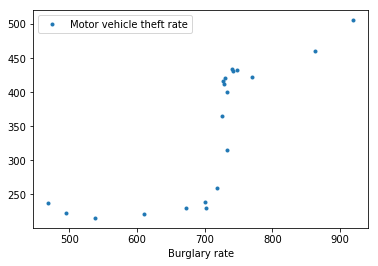

In [147]:
df.plot(x='Burglary rate', y= 'Motor vehicle theft rate', style='.')

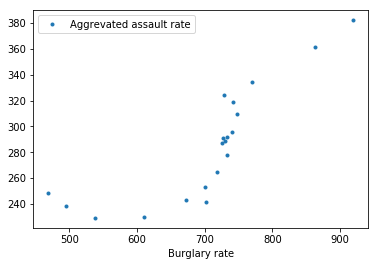

In [148]:
df.plot(x='Burglary rate', y= 'Aggrevated assault rate', style='.')

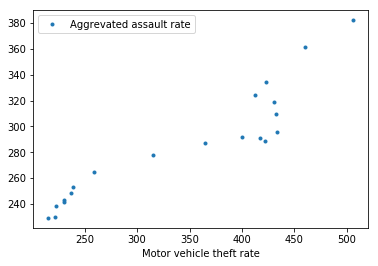

In [149]:
df.plot(x='Motor vehicle theft rate', y= 'Aggrevated assault rate', style='.')

In [150]:
df['Motor vehicle theft rate'].corr(df['Aggrevated assault rate'])

0.9256340124469733

In [151]:
df['Burglary rate'].corr(df['Aggrevated assault rate'])

0.8328772958272302

In [152]:
df['Violent Crime Rate'].corr(df['Motor vehicle theft rate'])

0.935713217431191

In [199]:
print('All of these instances of theft have a high correlation. This means they may have similar trends, and they are all theft. I could do more in depth statistical analysis like hypothesis tests to see more in depth relationships')

All of these instances of theft have a high correlation. This means they may have similar trends, and they are all theft. I could do more in depth statistical analysis like hypothesis tests to see more in depth relationships


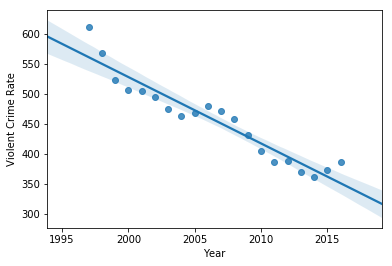

In [155]:
ax = sns.regplot(df['Year'], df['Violent Crime Rate'], fit_reg = True)

In [198]:
print('The Violent Crime Rate generally decreases in the longterm. This may be due to policies enacted over the years. To improve this analysis I could do a regression and find the best fit line through the points.')

The Violent Crime Rate generally decreases in the longterm. This may be due to policies enacted over the years. To improve this analysis I could do a regression and find the best fit line through the points.


In [ ]:
print('My 4th question is how the long term trend will look if I added a row with 2017 data. To do this, I got the data from: https://ucr.fbi.gov/crime-in-the-u.s/2017/crime-in-the-u.s.-2017/tables/table-1.')

In [180]:
newdf = df.append(pd.Series (['2017','325,719,178' , '1,247,321', '382.9','17,284' , '5.3', '135,755', '41.7', '99,856','30.7', '319,356','98.0','810,825', '248.9', '7,694,086','2,362.2','1,401,840','430.4','5,519,107','1,694','773,139','237.4','NaN'] ,index = df.columns),ignore_index = True)

In [181]:
newdf.head(50)

,Year,Population,Violent Crime,Violent Crime Rate,Murder and nonnegligent manslaughter,Murder and nonnegligent manslaughter rate,Rape,Rape rate,Rape (legacy definition),Rape (legacy definition rate),...,Aggrevated assault rate,Property crime,Property crime rate,Burglary,Burglary rate,Larceny theft,Larceny theft rate,Motor vehicle theft,Motor vehicle theft rate,Unnamed: 22
0,1997,"267,783,607","1,636,096",611,"18,208",6.8,NaN,NaN,"96,153",35.9,...,382.1,"11,558,475","4,316.3","2,460,526",918.8,"7,743,760","2,891.8","1,354,189",505.7,NaN
1,1998,"270,248,003","1,533,887",567.6,"16,974",6.3,NaN,NaN,"93,144",34.5,...,361.4,"10,951,827","4,052.5","2,332,735",863.2,"7,376,311","2,729.5","1,242,781",459.9,NaN
2,1999,"272,690,813","1,426,044",523,"15,522",5.7,NaN,NaN,"89,411",32.8,...,334.3,"10,208,334","3,743.6","2,100,739",770.4,"6,955,520","2,550.7","1,152,075",422.5,NaN
3,2000,"281,421,906","1,425,486",506.5,"15,586",5.5,NaN,NaN,"90,178",32,...,324,"10,182,584","3,618.3","2,050,992",728.8,"6,971,590","2,477.3","1,160,002",412.2,NaN
4,2001,"285,317,559","1,439,480",504.5,"16,037",5.6,NaN,NaN,"90,863",31.8,...,318.6,"10,437,189","3,658.1","2,116,531",741.8,"7,092,267","2,485.7","1,228,391",430.5,NaN
5,2002,"287,973,924","1,423,677",494.4,"16,229",5.6,NaN,NaN,"95,235",33.1,...,309.5,"10,455,277","3,630.6","2,151,252",747,"7,057,379","2,450.7","1,246,646",432.9,NaN
6,2003,"290,788,976","1,383,676",475.8,"16,528",5.7,NaN,NaN,"93,883",32.3,...,295.4,"10,442,862","3,591.2","2,154,834",741,"7,026,802","2,416.5","1,261,226",433.7,NaN
7,2004,"293,656,842","1,360,088",463.2,"16,148",5.5,NaN,NaN,"95,089",32.4,...,288.6,"10,319,386","3,514.1","2,144,446",730.3,"6,937,089","2,362.3","1,237,851",421.5,NaN
8,2005,"296,507,061","1,390,745",469,"16,740",5.6,NaN,NaN,"94,347",31.8,...,290.8,"10,174,754","3,431.5","2,155,448",726.9,"6,783,447","2,287.8","1,235,859",416.8,NaN
9,2006,"299,398,484","1,435,123",479.3,"17,309",5.8,,NaN,"94,472",31.6,...,292,"10,019,601","3,346.6","2,194,993",733.1,"6,626,363","2,213.2","1,198,245",400.2,NaN


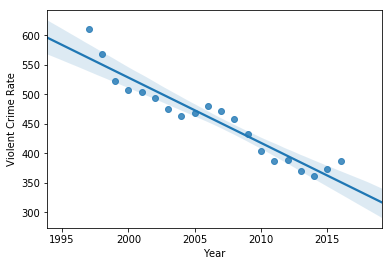

In [194]:
ax = sns.regplot(df['Year'], df['Violent Crime Rate'], fit_reg = True)

In [201]:
print('By adding 2017, the trend continues to decrease. For further analysis, I could do a regression with the best fit line through the points.')

By adding 2017, the trend continues to decrease. For further analysis, I could do a regression with the best fit line through the points.


In [202]:
print(' Conclusion: Overall, the violent crime rate has decreased from 1997 to 2017. Even if instances of crimes go up, the overall rate is decreasing. This is useful for policy makers to know because it shows that policies and laws are working to combat crime.')

 Conclusion: Overall, the violent crime rate has decreased from 1997 to 2017. Even if instances of crimes go up, the overall rate is decreasing. This is useful for policy makers to know because it shows that policies and laws are working to combat crime.
